In [1]:
import sympy
import matplotlib.pyplot as plt
import numpy
sympy.init_printing()
%matplotlib inline

In [2]:
tau, zeta, t, w, K = sympy.symbols('tau, zeta, t, w, K', real=True, positive=True)
s = sympy.Symbol('s')

In [3]:
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)
def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

This is the standard form for the second order system transfer function

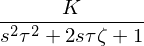

In [4]:
G = K/(tau**2*s**2 + 2*tau*zeta*s + 1)
G

In recent versions of Sympy, we can solve for the step response directly.

In [5]:
sympy.__version__

'1.0'

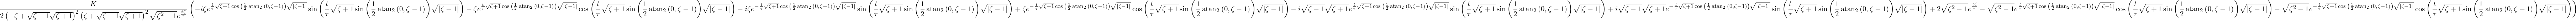

In [6]:
invL(G/s)

That's a really hairy expression, so let's try to simplify.

The characteristic equation is the denominator of the transfer function

In [7]:
ce = sympy.Eq(sympy.denom(G), 0)
ce

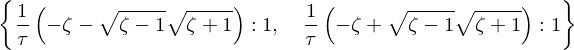

In [8]:
roots = sympy.roots(ce, s)
roots

The shape of the inverse Laplace depends on the nature of the roots, which depends on the value of $\zeta$

Overdamped: $\zeta>1$. Two distinct real roots

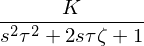

In [9]:
G

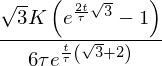

In [10]:
invL(G.subs({zeta: 2})).simplify()

Critically damped: $\zeta=1$. Repeated roots.

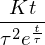

In [11]:
invL(G.subs({zeta: 1}))

Underdamped: $0<\zeta<1$: a complex conjugate pair of roots

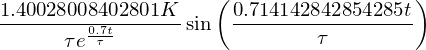

In [12]:
r = invL(G.subs({zeta: 0.7}))
r

We can get prettier results if we use `Rational`s instead of `floats`

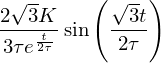

In [13]:
r = invL(G.subs({zeta: sympy.Rational(1, 2)}))
r

In [14]:
from ipywidgets import interact

In [15]:
def secondorder(K_in, tau_in, zeta_in, tmax):
    values = {K: sympy.nsimplify(K_in), tau: sympy.nsimplify(tau_in), zeta: sympy.nsimplify(zeta_in)}
    stepresponse = sympy.re(invL(G.subs(values)/s))

    sympy.plot(stepresponse, (t, 0, tmax), ylim = [0, 10])

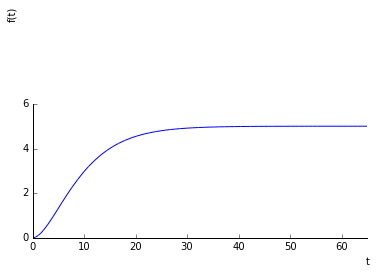

In [16]:
interact(secondorder, K_in=(0, 10.), tau_in=(0., 10.), zeta_in=(0., 2), tmax=(30., 100));

In [17]:
a s^2 + b s + 1 = (s - r1)(s - r2)

SyntaxError: invalid syntax (<ipython-input-17-14ba2017669d>, line 1)